<a href="https://colab.research.google.com/github/abhishekY2401/tesla-stock-prediction/blob/main/tesla_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas_datareader as pdr

In [3]:
df = pdr.get_data_tiingo('TSLA', api_key='42bad531172b90ea5a72daf4d974878da5cffe03')

/usr/local/lib/python3.8/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [4]:
df.to_csv('TSLA.csv')

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('TSLA.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2018-01-03 00:00:00+00:00,317.25,325.25,315.55,321.00,4185665,21.150000,21.683333,21.036667,21.400000,62784975,0.0,1.0
1,TSLA,2018-01-04 00:00:00+00:00,314.62,318.55,305.68,312.87,9915932,20.974667,21.236667,20.378667,20.858000,148738980,0.0,1.0
2,TSLA,2018-01-05 00:00:00+00:00,316.58,317.24,312.00,316.62,4578729,21.105333,21.149333,20.800000,21.108000,68680935,0.0,1.0
3,TSLA,2018-01-08 00:00:00+00:00,336.41,337.02,315.50,316.00,9777059,22.427333,22.468000,21.033333,21.066667,146655885,0.0,1.0
4,TSLA,2018-01-09 00:00:00+00:00,333.69,338.80,327.40,335.16,7109115,22.246000,22.586667,21.826667,22.344000,106636725,0.0,1.0


In [7]:
df1 = df.reset_index()['close']
df1

0       317.25
1       314.62
2       316.58
3       336.41
4       333.69
         ...  
1253    123.15
1254    109.10
1255    112.71
1256    121.82
1257    123.18
Name: close, Length: 1258, dtype: float64

In [8]:
df1.shape

(1258,)

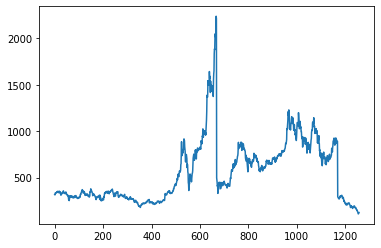

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))
df1

array([[0.09773907],
       [0.09650412],
       [0.09742446],
       ...,
       [0.00169511],
       [0.00597281],
       [0.00661142]])

In [12]:
df1.shape

(1258, 1)

In [13]:
# splitting data set into training set and test dataset
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0: training_size, :], df1[training_size:len(df1), :1]

In [14]:
train_data, test_data

(array([[0.09773907],
        [0.09650412],
        [0.09742446],
        [0.10673585],
        [0.10545864],
        [0.10597986],
        [0.10745897],
        [0.10664663],
        [0.10844975],
        [0.11178363],
        [0.11056746],
        [0.11312657],
        [0.11384969],
        [0.11442725],
        [0.11118728],
        [0.10731341],
        [0.10975982],
        [0.11289649],
        [0.11115442],
        [0.11514099],
        [0.11276501],
        [0.11018242],
        [0.10519569],
        [0.10559012],
        [0.11076938],
        [0.09679055],
        [0.09453197],
        [0.09702533],
        [0.10074895],
        [0.10011504],
        [0.10563708],
        [0.10630385],
        [0.10596577],
        [0.10527551],
        [0.11131876],
        [0.11407978],
        [0.11660132],
        [0.11358204],
        [0.10985843],
        [0.10416266],
        [0.10613012],
        [0.10529899],
        [0.10288076],
        [0.10480595],
        [0.10330336],
        [0

In [15]:
import numpy

def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step - 1): 
    a = dataset[i: (i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return numpy.array(dataX), numpy.array(dataY)

In [16]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape)
print(Y_train.shape)

(716, 100)
(716,)


In [18]:
print(X_test.shape)
print(Y_test.shape)

(340, 100)
(340,)


In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [20]:
# Create the Stacked LSTM model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 213ms/step - loss: 0.0258 - val_loss: 0.0127
Epoch 2/100
12/12 [==============================] - 2s 127ms/step - loss: 0.0126 - val_loss: 0.0054
Epoch 3/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0092 - val_loss: 0.0098
Epoch 4/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0087 - val_loss: 0.0060
Epoch 5/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0070 - val_loss: 0.0038
Epoch 6/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0062 - val_loss: 0.0029
Epoch 7/100
12/12 [==============================] - 1s 124ms/step - loss: 0.0056 - val_loss: 0.0026
Epoch 8/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0054 - val_loss: 0.0038
Epoch 9/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0052 - val_loss: 0.0025
Epoch 10/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0045 - val_lo

In [24]:
import tensorflow as tf

In [25]:
# do some prediction and check performance metrics

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 23ms/step


In [26]:
# transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [27]:
# calculate RMSE Performance metrics for trained data set
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))

614.7521191984183

In [28]:
# calculate RMSE Performance metrics for test data set
math.sqrt(mean_squared_error(Y_test, test_predict))

799.4567141286685

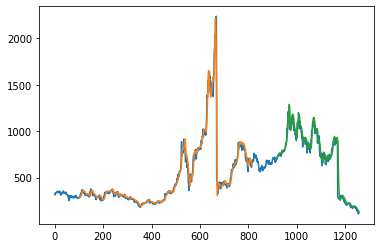

In [29]:
## Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back: len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1: len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [30]:
x_input = test_data[341:].reshape(1, -1)
x_input.shape

(1, 100)

In [31]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.3634259150564647,
 0.352541497429155,
 0.3714178386119785,
 0.38450449604395087,
 0.3806212288404198,
 0.377005611250675,
 0.3754184959969948,
 0.366679970887235,
 0.3571666705796727,
 0.36637945202263283,
 0.3672857042236987,
 0.08779376892916675,
 0.08404667433615852,
 0.08251121076233182,
 0.07916793839363274,
 0.0781865564764163,
 0.07891437560162469,
 0.07565092855633553,
 0.07762777921254667,
 0.08198530274927805,
 0.08459606038550933,
 0.08948888314981333,
 0.09171460099077312,
 0.08594369966895969,
 0.09086469607682014,
 0.09139999530439273,
 0.0912121710140164,
 0.09389805836639824,
 0.09373840771957832,
 0.09001479116286713,
 0.08428145469912894,
 0.07805507947315286,
 0.07837438076679266,
 0.08162843659756298,
 0.08391519733289508,
 0.07471180710445376,
 0.07332190735566876,
 0.06259244476791961,
 0.06589815227854341,
 0.061845843213673604,
 0.060587420468152034,
 0.053515835935482356,
 0.05346418425562886,
 0.050430821966050754,
 0.05077829690324702,
 0.05288192895546216

In [32]:
# demonstrate prediction for next 30 days

from numpy import array

lst_output = []
n_steps = 100
i=0

while (i < 30):
  if (len(temp_input) > 100):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape(1, n_steps, 1)

    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]

    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape(1, n_steps, 1)
    yhat = model.predict(x_input, verbose=0)
    # print(yhat[0])
    temp_input.extend(yhat[0].tolist())

    lst_output.extend(yhat.tolist())
    i=i+1

1 day input [0.3525415  0.37141784 0.3845045  0.38062123 0.37700561 0.3754185
 0.36667997 0.35716667 0.36637945 0.3672857  0.08779377 0.08404667
 0.08251121 0.07916794 0.07818656 0.07891438 0.07565093 0.07762778
 0.0819853  0.08459606 0.08948888 0.0917146  0.0859437  0.0908647
 0.0914     0.09121217 0.09389806 0.09373841 0.09001479 0.08428145
 0.07805508 0.07837438 0.08162844 0.0839152  0.07471181 0.07332191
 0.06259244 0.06589815 0.06184584 0.06058742 0.05351584 0.05346418
 0.05043082 0.0507783  0.05288193 0.04502618 0.05176907 0.0521635
 0.05303219 0.04610147 0.04946353 0.04796563 0.05320827 0.05425305
 0.05446435 0.05607494 0.05561477 0.05574625 0.04971709 0.04987204
 0.04619069 0.04131195 0.03859789 0.03216021 0.03832555 0.04079074
 0.03843355 0.04006292 0.03654122 0.03478036 0.03338107 0.02759608
 0.02855399 0.03479445 0.0346348  0.03466297 0.03368159 0.0401944
 0.0401944  0.04026953 0.03444228 0.03320733 0.03049327 0.03021154
 0.03284577 0.02757261 0.02434672 0.02239805 0.0228065

In [33]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)
day_new, day_pred

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 128, 129, 130]))

In [34]:
import matplotlib.pyplot as plt


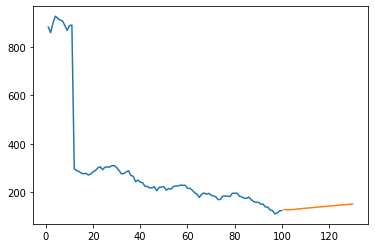

In [35]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))